# Simple Fine Tuning
Fine tuning for BertForSequenceClassification adds 10 layers

**Waring** : The following code executes only on Google Colab.

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 4.8 MB/s eta 0:00:00


## Load the model

In [2]:
# load the BertForSequenceClassification
from transformers import BertForSequenceClassification

sc_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', return_dict=True)
print(sc_model.state_dict().keys())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

odict_keys(['bert.embeddings.position_ids', 'bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weigh

## Optimizer

In [3]:
# loadt the AdamW optimizer
from transformers import AdamW

optimizer = AdamW(sc_model.parameters(), lr=1e-5)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Tokenizer

In [4]:
# load the Tokenizer
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# set the sentences for testing
sentences = ["I love basketball", "I hate football"]
tokenized = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
print(tokenized)

x = tokenized['input_ids']
attention_mask = tokenized['attention_mask']

{'input_ids': tensor([[ 101, 1045, 2293, 3455,  102],
        [ 101, 1045, 5223, 2374,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])}


## Fine Tuning

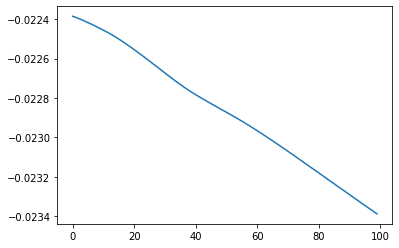

In [5]:
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt

# set the model to training mode
sc_model.train()
t = torch.tensor([1, 0]) # labels
weights_recorder = []

# run the training loop
for i in range(100):
    outputs = sc_model(x, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, t)
    loss.backward()
    optimizer.step()

    # record the weights
    weight = sc_model.state_dict()['bert.encoder.layer.11.output.dense.weight'][0][0].item()
    weights_recorder.append(weight)

# print the loss
plt.plot(range(len(weights_recorder)), weights_recorder)
plt.show()